In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

matplotlib settings set


matplotlib settings set


# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [3]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [4]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getat

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

### Primary filters and DESI duplicates (ra,dec) removal

In [7]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
174908,2CXO J004757.2-251503,11.988394,-25.250993,3.616555e-15,0.523700,1.464868,9010,11489,189537,11.996184,-25.254122,1,0.066846,0.251450,1.498240,15.842487,19.724510,131.694200,19293.62000,2974.14430,2063.01270,284.370450,3.377115,0.693958,0.001074,0.000013,25.377094,23.958307,22.038359,19.496994,19.260366,17.200632,11.786295,3.645499,11.420975,25.265251,29.113628,16.431335,4.316188,68.388730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.752149,9010_189537_11489,25.437311,NaN,NaN,23.998871,23.998871,23.958307,22.061047,22.061047,22.038359,19.500442,19.500442,19.496994,16.801442,19.262484,19.262484,19.260366,15.923484,17.201083,17.201083,17.200632,12.027083,11.786466,11.786466,11.786295,5.166466,2.554132e-15,NaN,NaN,1.919948,2.541365,4.697941,0.236628,4.837727,12.172012,5.414337
338283,2CXO J012034.4+033323,20.143677,3.556536,9.322712e-15,1.675899,4.687741,9010,4332,350606,20.144752,3.563473,1,0.286790,0.930282,1.643853,1.337291,1.766765,-36.732950,-1789.08080,2239.65670,1386.08940,211.682220,2.848503,0.604790,0.001130,0.000015,23.741537,22.501300,21.917181,22.177877,21.878025,NaN,NaN,13.572353,34.634590,23.916920,2.257014,1.373982,-1.234730,-7.032901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.267948,9010_350606_4332,23.856090,23.856090,23.741537,22.578463,22.578463,22.501300,21.960343,21.960343,21.917181,22.184435,NaN,NaN,NaN,21.882053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.855713e-15,1.240237,1.824356,0.584119,NaN,NaN,NaN,NaN,NaN,NaN
2746120,2CXO J170924.7+342539,257.353178,34.427624,1.762209e-14,0.494923,1.384374,9011,3684,518526,257.356635,34.434012,1,0.053084,0.163548,1.209816,10.314750,8.147308,3.153446,261.22040,237.78687,73.24944,32.398210,4.378406,1.218772,0.001584,0.000020,25.599750,24.406713,22.260103,19.961325,20.219376,21.252378,16.457233,0.818569,1.399739,6.886201,21.583242,8.994467,0.125522,1.166058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.184813,9011_518526_3684,25.687591,NaN,NaN,24.465887,NaN,NaN,22.293202,22.293202,22.260103,19.966353,19.966353,19.961325,17.267353,20.222465,20.222465,20.219376,16.883465,21.253037,NaN,NaN,NaN,16.457482,NaN,NaN,NaN,2.082312e-15,NaN,NaN,NaN,2.298778,NaN,-0.258051,NaN,NaN,NaN
2249701,2CXO J134207.3+281927,205.530491,28.324272,3.642663e-15,0.592963,1.658607,9012,2405,487577,205.527973,28.316879,1,11.290746,15.248536,16.598260,0.000000,0.000000,0.000000,0.00000,341.02440,247.16025,145.600170,0.000000,0.000000,0.000000,0.000000,19.825836,19.513397,19.433884,inf,inf,inf,inf,208.504470,239.727280,200.282750,0.000000,0.000000,0.000000,0.000000,0.460458,3.977423,-0.423159,1.502391,-1.931532,4.108137,27.784716,9012_487577_2405,19.868193,19.868193,19.825836,19.541930,19.541930,19.513397,19.449844,19.449844,19.433884,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,2.812117e-14,0.312439,0.391952,0.079513,NaN,NaN,NaN,NaN,NaN,NaN
2110393,2CXO J125856.9+235541,194.737473,23.928226,3.611086e-15,0.451054,1.261664,9010,4978,465526,194.738758,23.927660,1,0.173387,0.394636,0.602021,-1.451098,-4.244450,-5.534573,1860.85330,776.546

# Calculating desi-sources around each source

In [8]:
def annuli_area_deg2(r_in_arcsec, r_out_arcsec):
    r_in_deg = r_in_arcsec/3600
    r_out_deg = r_out_arcsec/3600
    area = np.pi*(r_out_deg**2 - r_in_deg**2)
    return area

csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))
smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep

csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 2*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_radec_err',
       'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc_x_ray_only = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,smallest_sep,is_hostless
1353587,2CXO J233238.8+001435,353.161831,0.243099,1.312530e-14,0.583407,1.631875,9010,5944,333220,353.165252,0.238821,1,0.082543,0.105826,0.029075,5.420541,7.024903,70.790350,1496.112400,3574.49270,2717.86000,382.144800,2.755457,0.587299,0.000595,0.000008,25.091866,24.860088,26.297314,20.658228,20.379305,17.874191,14.562260,4.935020,5.517045,0.568382,8.997866,5.383564,1.727167,4.234795,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,19.720534,9010_333220_5944,25.208299,25.208299,25.091866,24.938519,24.938519,24.860088,26.341201,NaN,NaN,20.664893,20.664893,20.658228,17.965893,20.383399,20.383399,20.379305,17.044399,17.875065,NaN,NaN,NaN,14.562589,14.562589,14.56226,7.942589,NaN,0.231778,NaN,NaN,NaN,4.480783,0.278923,NaN,10.297828,NaN,0.322784,False
1093170,2CXO J153712.4+060054,234.301809,6.015057,5.980718e-15,1.367111,3.824014,9010,1610,365823,234.297773,6.018562,1,0.219287,1.113033,4.985703,3.018244,0.307873,-20.229698,308.924380,1606.28690,494.03630,109.791860,3.813419,0.844408,0.001890,0.000011,23.967880,22.262754,20.688017,21.290333,23.772757,NaN,16.274860,8.788677,24.739304,52.240993,5.894019,0.282910,-0.879401,1.022979,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,19.182402,9010_365823_1610,24.147468,24.147468,23.967880,22.383730,22.383730,22.262754,20.755684,20.755684,20.688017,21.300614,21.300614,21.290333,18.601614,23.779071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.275370,NaN,NaN,NaN,8.858907e-15,1.705126,3.279863,1.574737,-0.602316,NaN,NaN,NaN,NaN,NaN,0.339553,False
364089,2CXO J041804.0-115921,64.516939,-11.989425,1.399372e-14,0.563045,1.574921,9010,5025,261962,64.518326,-11.983101,1,0.222219,0.256099,0.266527,0.996876,-0.173108,9.997744,142.598920,1481.53490,522.72906,164.271910,3.984727,0.877447,0.001038,0.000012,24.024927,23.906147,23.894909,22.497208,NaN,19.999434,17.114403,8.553364,5.855271,3.416036,1.989941,-0.162154,0.322080,0.487895,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,23.283160,9010_261962_5025,24.133047,24.133047,24.024927,23.978980,23.978980,23.906147,23.935647,NaN,NaN,22.503397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000245,NaN,NaN,NaN,17.114709,NaN,NaN,NaN,NaN,0.118780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952723,False
981524,2CXO J141746.9+263444,214.445762,26.578936,1.361163e-14,5.352740,14.972416,9010,2737,478643,214.453458,26.581364,1,0.203828,0.325976,0.864489,1.627485,2.709543,12.394061,149.123060,749.71265,375.00200,57.519405,4.343213,1.049360,0.002335,0.000030,24.156536,23.669678,22.631613,21.967182,21.415289,19.766440,17.065939,5.580992,6.312520,6.556418,3.391739,2.775610,0.598955,0.817343,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,26.276031,9010_478643_2737,24.226840,24.226840,24.156536,23.717036,23.717036,23.669678,22.658101,22.658101,22.631613,21.971208,NaN,NaN,NaN,21.417760,NaN,NaN,NaN,19.766966,NaN,NaN,NaN,17.066138,NaN,NaN,NaN,1.478910e-15,0.486858,1.524923,1.038065,NaN,NaN,NaN,NaN,NaN,NaN,1.326497,False
1088338,2CXO J153036.3+770219,232.651447,77.038808,3.115773e-14,6.184821,17.299869,9011,3607,653551,232.640955,77.039735,1,0.876816,3.460709,21.735125,

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 3769
number of not hostless x-ray sources with flux > 3e-15: 56903
fraction of hostless x-ray sources with flux > 3e-15: 0.062120912447257384
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 606
number of not hostless x-ray sources with flux > 1e-14: 22818
fraction of hostless x-ray sources with flux > 1e-14: 0.025870901639344263


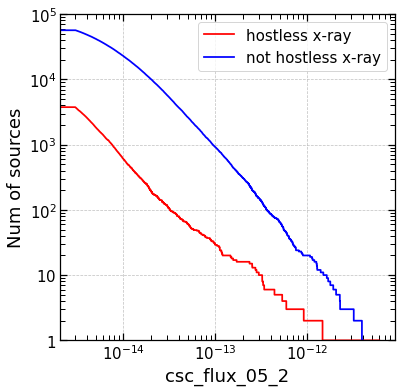

In [9]:
fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 43
number of not hostless x-ray sources with flux > 3e-15: 611
fraction of hostless x-ray sources with flux > 3e-15: 0.06574923547400612
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 3
number of not hostless x-ray sources with flux > 1e-14: 245
fraction of hostless x-ray sources with flux > 1e-14: 0.012096774193548387


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,smallest_sep
668776,2CXO J104250.7+591245,160.711368,59.212503,3.033728e-15,0.608442,1.701902,7.503057
658804,2CXO J103239.3+574035,158.164092,57.676566,8.115216e-15,0.428977,1.199912,9.702210
684593,2CXO J105327.9+544838,163.366556,54.810613,1.659112e-14,0.563629,1.576553,6.170507
670907,2CXO J104411.1+585424,161.046365,58.906818,6.099061e-15,0.415344,1.161780,2.884135
693928,2CXO J110439.8+594606,166.166150,59.768338,3.224983e-15,0.495251,1.385292,4.585648


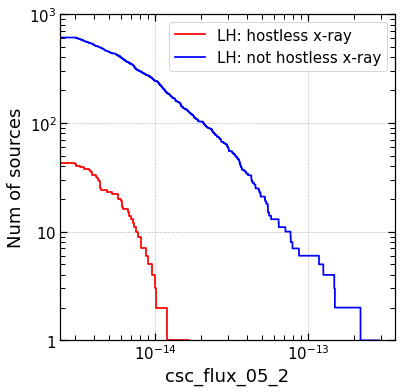

In [10]:
ra_min = 154.763934
ra_max = 167.084550
dec_min = 54.124219
dec_max = 61.236185

hostless_df_lh = hostless_df.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')
desi_csc_x_ray_only_lh = desi_csc_x_ray_only.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')

fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df_lh['csc_flux_05_2'], label='LH: hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only_lh['csc_flux_05_2'], label='LH: not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e3])
ax.legend()


for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

hostless_df_lh.sample(5)

In [12]:
ero_hostless.columns

Index(['srcname_fin', 'RA_fin', 'DEC_fin', 'GLON', 'GLAT', 'pos_r98',
       'DET_LIKE_0', 'ML_FLUX_0', 'ML_FLUX_ERR_0', 'ML_CTS_0', 'ML_CTS_ERR_0',
       'ML_EXP_1', 'EXT', 'EXT_LIKE', 'EXT_ERR', 'ID_SRC', 'ID_CLUSTER', 'RA',
       'DEC', 'RADEC_ERR', 'DIST_NN', 'SRCDENS', 'TSTART', 'TSTOP',
       'EXT_LOWERR', 'EXT_UPERR', 'ML_RATE_0', 'ML_RATE_ERR_0', 'ML_BKG_0',
       'RA_corr', 'DEC_corr', 'g_id', 'g_d2d', 'g_nsrc', 'g_s', 'g_gmag',
       'g_maxLx', 'g_b', 's_id', 's_z', 's_otype', 's_d2d', 's_nsrc',
       'flag_xray', 'flag_radio', 'flag_agn_wise', 'w1', 'w2', 'w3', 'w1snr',
       'w2snr', 'w3snr', 'w_nsrc', 'sdss_nsrc', 'sdss_p', 'sdss_id', 'sdss_sp',
       'sdss_d2d', 'hpidx', 'RADEC_ERR_fin', 'pos_sigma_2d', 'pos_r68',
       'pos_r95', 'ELON', 'ELAT', 'flux_05-20', 'NH', 'matched_sep',
       'matched_csc_name', 'matched_csc_ra', 'matched_csc_dec',
       'matched_csc_flux_05_2', 'matched_csc_radec_err', 'matched_csc_r_98',
       'matched_smallest_sep'],
      dtype=

In [18]:
len(hostless_df_lh)

43

In [21]:
erosita_orig_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')

from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
ero_hostless = cross_match_data_frames(erosita_orig_df, hostless_df_lh, 'RA_fin', 'DEC_fin', 'csc_ra', 'csc_dec', match_radius = 20)
#ero_hostless = ero_hostless.query('matched_sep < 2*pos_r98')
ero_hostless['flux_rat'] = ero_hostless['flux_05-20']/ero_hostless['matched_csc_flux_05_2']
ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat']]


cross-match radius 20 arcsec
total matches: 15 out of 9215 x 43


,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat
0,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883
1,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048
2,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224
3,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510
4,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871
5,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787
6,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902
7,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666
8,SRGe J103121.9+573134,8.679921,4.350933e-15,0.504317,2CXO J103121.9+573134,3.862979e-15,2.331750,1.126315
9,SRGe J104936.9+573948,9.103259,3.769282e-15,10.416745,2CXO J104936.4+573937,6.636879e-15,2.180008,0.567930


In [ ]:
ero_hostless

In [214]:
finall_hostless = pd.DataFrame({'ID': ero_hostless.srcname_fin,	'desi_id_true_ctp': 'hostless'})
finall_hostless.ID = finall_hostless.ID.str.encode('utf-8')
finall_hostless.desi_id_true_ctp = finall_hostless.desi_id_true_ctp.str.encode('utf-8')
finall_hostless.to_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')

finall_hostless

,ID,desi_id_true_ctp
0,b'SRGe J104522.1+555738',b'hostless'
1,b'SRGe J103220.4+573211',b'hostless'
2,b'SRGe J103239.4+574033',b'hostless'
3,b'SRGe J104453.1+585450',b'hostless'
4,b'SRGe J103302.4+580241',b'hostless'
5,b'SRGe J105118.0+552353',b'hostless'
6,b'SRGe J104854.4+573926',b'hostless'
7,b'SRGe J104544.5+585020',b'hostless'
8,b'SRGe J103121.9+573134',b'hostless'
9,b'SRGe J104936.9+573948',b'hostless'
